In [1]:
import pandas as pd

# Load just the first 1 million rows in chunks
chunk_size = 1000000
chunks = pd.read_csv("2019-Nov.csv", chunksize=chunk_size)

# Combine the first chunk only (for now)
df = next(chunks)
print("Loaded chunk shape:", df.shape)
df.head()


Loaded chunk shape: (1000000, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [2]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [3]:
# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Create new time-based columns
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour
df['day_of_week'] = df['event_time'].dt.day_name()

# Check event types
print("Event Types:\n", df['event_type'].value_counts())


Event Types:
 view        967225
purchase     17817
cart         14958
Name: event_type, dtype: int64


In [4]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    316977
brand            147197
price                 0
user_id               0
user_session          0
date                  0
hour                  0
day_of_week           0
dtype: int64

In [5]:
df['category_code'].value_counts()


electronics.smartphone           270434
electronics.video.tv              29459
electronics.clocks                29356
computers.notebook                28166
electronics.audio.headphone       27438
                                  ...  
construction.tools.soldering         45
apparel.shorts                       19
country_yard.furniture.hammok        17
apparel.shoes.espadrilles            15
apparel.shoes.step_ins               15
Name: category_code, Length: 123, dtype: int64

In [6]:
category_price_median = df.groupby('category_code')['price'].median().sort_values(ascending=False)
print(category_price_median)


category_code
computers.notebook              617.75
electronics.camera.photo        591.78
furniture.living_room.sofa      545.45
electronics.video.projector     438.41
computers.desktop               422.02
                                 ...  
appliances.personal.scales       12.84
kids.fmcg.diapers                12.36
construction.tools.soldering     12.14
apparel.shorts                   11.81
stationery.cartrige              11.71
Name: price, Length: 123, dtype: float64


ValueError: Columns must be same length as key

In [8]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,hour,day_of_week
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01,0,Friday
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01,0,Friday
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,Unknown.Unknown.Unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01,0,Friday
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01,0,Friday
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01,0,Friday
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,2019-11-01,0,Friday
6,2019-11-01 00:00:01+00:00,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376,2019-11-01,0,Friday
7,2019-11-01 00:00:02+00:00,view,15900065,2053013558190408249,Unknown.Unknown.Unknown,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f,2019-11-01,0,Friday
8,2019-11-01 00:00:02+00:00,view,12708937,2053013553559896355,Unknown.Unknown.Unknown,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24,2019-11-01,0,Friday
9,2019-11-01 00:00:02+00:00,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0,2019-11-01,0,Friday


In [9]:
import pandas as pd

# Define a custom function to impute missing category_code based on price
def impute_category_code(row):
    """
    Impute missing category_code using price-based heuristics.
    For non-null category_code, returns the original value.
    For nulls, maps price ranges to the most likely categories based on median analysis.
    """
    if pd.notnull(row['category_code']):
        return row['category_code']
    
    price = row['price']
    
    # Price-based logic (refined using earlier median analysis)
    if price > 500:
        return 'computers.notebook'
    elif 400 < price <= 500:
        return 'electronics.camera.photo'
    elif 300 < price <= 400:
        return 'electronics.video.projector'
    elif 200 < price <= 300:
        return 'electronics.video.tv'
    elif 100 < price <= 200:
        return 'electronics.audio.headphone'
    elif 50 < price <= 100:
        return 'apparel.shoes.sneakers'
    elif 20 < price <= 50:
        return 'appliances.kitchen.toaster'
    elif price <= 20:
        return 'stationery.cartrige'
    else:
        return 'Unknown'  # Fallback in case price is missing or doesn't match

# Apply the function to the DataFrame
df['category_code'] = df.apply(impute_category_code, axis=1)

# Check results
print("Missing category_code values after imputation:", df['category_code'].isnull().sum())

# Optional: View top 10 categories post-imputation
print("\n Top 10 categories after imputation:\n")
print(df['category_code'].value_counts().head(10))


Missing category_code values after imputation: 0

 Top 10 categories after imputation:

Unknown.Unknown.Unknown             316977
electronics.smartphone              270434
electronics.video.tv                 29459
electronics.clocks                   29356
computers.notebook                   28166
electronics.audio.headphone          27438
appliances.kitchen.washer            20684
apparel.shoes                        20683
appliances.kitchen.refrigerators     19933
appliances.environment.vacuum        19220
Name: category_code, dtype: int64


In [10]:
print("Dataset shape:", df.shape)
print("\n Columns:\n", df.columns.tolist())
print("\n Missing values:\n", df.isnull().sum())

print("\n Summary statistics:\n")
print(df.describe())


Dataset shape: (1000000, 12)

 Columns:
 ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session', 'date', 'hour', 'day_of_week']

 Missing values:
 event_time            0
event_type            0
product_id            0
category_id           0
category_code         0
brand            147197
price                 0
user_id               0
user_session          0
date                  0
hour                  0
day_of_week           0
dtype: int64

 Summary statistics:

         product_id   category_id           price       user_id  \
count  1.000000e+06  1.000000e+06  1000000.000000  1.000000e+06   
mean   1.060944e+07  2.057550e+18      292.181443  5.352224e+08   
std    1.200388e+07  1.892062e+16      347.585961  2.014677e+07   
min    1.000978e+06  2.053014e+18        0.000000  2.749691e+08   
25%    1.005186e+06  2.053014e+18       69.720000  5.159483e+08   
50%    4.900340e+06  2.053014e+18      172.180000  5.307922e+08

In [11]:
# Top N categories and brands to retain
top_n = 10

# CATEGORY
top_categories = df['category_code'].value_counts().nlargest(top_n).index
df['category_code'] = df['category_code'].apply(lambda x: x if x in top_categories else 'Other')

# BRAND
df['brand'].fillna('Unknown', inplace=True)  # First handle nulls
top_brands = df['brand'].value_counts().nlargest(top_n).index
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'Other')


In [12]:
# One-hot encode selected columns
df_encoded = pd.get_dummies(df, columns=['event_type', 'category_code', 'brand'], drop_first=True)

# Check final shape and column list
print(" Encoded shape:", df_encoded.shape)
print(" Encoded columns:\n", df_encoded.columns.tolist())


 Encoded shape: (1000000, 31)
 Encoded columns:
 ['event_time', 'product_id', 'category_id', 'price', 'user_id', 'user_session', 'date', 'hour', 'day_of_week', 'event_type_purchase', 'event_type_view', 'category_code_Unknown.Unknown.Unknown', 'category_code_apparel.shoes', 'category_code_appliances.environment.vacuum', 'category_code_appliances.kitchen.refrigerators', 'category_code_appliances.kitchen.washer', 'category_code_computers.notebook', 'category_code_electronics.audio.headphone', 'category_code_electronics.clocks', 'category_code_electronics.smartphone', 'category_code_electronics.video.tv', 'brand_Unknown', 'brand_apple', 'brand_bosch', 'brand_cordiant', 'brand_huawei', 'brand_lg', 'brand_lucente', 'brand_oppo', 'brand_samsung', 'brand_xiaomi']


In [13]:
print("Dataset shape:", df.shape)
print("\n Columns:\n", df.columns.tolist())
print("\n Missing values:\n", df.isnull().sum())

print("\n Summary statistics:\n")
print(df.describe())

Dataset shape: (1000000, 12)

 Columns:
 ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session', 'date', 'hour', 'day_of_week']

 Missing values:
 event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
date             0
hour             0
day_of_week      0
dtype: int64

 Summary statistics:

         product_id   category_id           price       user_id  \
count  1.000000e+06  1.000000e+06  1000000.000000  1.000000e+06   
mean   1.060944e+07  2.057550e+18      292.181443  5.352224e+08   
std    1.200388e+07  1.892062e+16      347.585961  2.014677e+07   
min    1.000978e+06  2.053014e+18        0.000000  2.749691e+08   
25%    1.005186e+06  2.053014e+18       69.720000  5.159483e+08   
50%    4.900340e+06  2.053014e+18      172.180000  5.307922e+08   
75%    1.570018e+07  2.053014e+18      361.970000  5.544

In [14]:
# First, fill nulls in category_code just in case
df['category_code'].fillna('Unknown.Unknown.Unknown', inplace=True)

# Then split into 3 new columns
df[['main_category', 'sub_category', 'product_type']] = df['category_code'].str.split('.', expand=True)

# If any category has fewer than 3 levels, fill with "Unknown"
df['sub_category'].fillna('Unknown', inplace=True)
df['product_type'].fillna('Unknown', inplace=True)

# Optional: check result
df[['category_code', 'main_category', 'sub_category', 'product_type']].head(10)


,category_code,main_category,sub_category,product_type
0,electronics.smartphone,electronics,smartphone,Unknown
1,Other,Other,Unknown,Unknown
2,Unknown.Unknown.Unknown,Unknown,Unknown,Unknown
3,appliances.kitchen.washer,appliances,kitchen,washer
4,electronics.smartphone,electronics,smartphone,Unknown
5,computers.notebook,computers,notebook,Unknown
6,computers.notebook,computers,notebook,Unknown
7,Unknown.Unknown.Unknown,Unknown,Unknown,Unknown
8,Unknown.Unknown.Unknown,Unknown,Unknown,Unknown
9,electronics.smartphone,electronics,smartphone,Unknown


In [15]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,hour,day_of_week,main_category,sub_category,product_type
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2019-11-01,0,Friday,electronics,smartphone,Unknown
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,Other,Other,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,2019-11-01,0,Friday,Other,Unknown,Unknown
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,Unknown.Unknown.Unknown,Other,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,2019-11-01,0,Friday,Unknown,Unknown,Unknown
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,2019-11-01,0,Friday,appliances,kitchen,washer
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,2019-11-01,0,Friday,electronics,smartphone,Unknown
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,Other,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,2019-11-01,0,Friday,computers,notebook,Unknown
6,2019-11-01 00:00:01+00:00,view,1306421,2053013558920217191,computers.notebook,Other,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376,2019-11-01,0,Friday,computers,notebook,Unknown
7,2019-11-01 00:00:02+00:00,view,15900065,2053013558190408249,Unknown.Unknown.Unknown,Other,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f,2019-11-01,0,Friday,Unknown,Unknown,Unknown
8,2019-11-01 00:00:02+00:00,view,12708937,2053013553559896355,Unknown.Unknown.Unknown,Other,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24,2019-11-01,0,Friday,Unknown,Unknown,Unknown
9,2019-11-01 00:00:02+00:00,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0,2019-11-01,0,Friday,electronics,smartphone,Unknown


**Event Type Distribution**

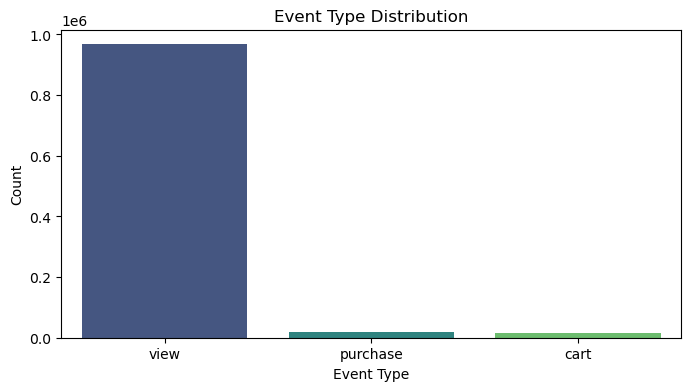


% Distribution:
 view        96.7225
purchase     1.7817
cart         1.4958
Name: event_type, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='event_type', order=df['event_type'].value_counts().index, palette='viridis')
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

# Optional % values
print("\n% Distribution:\n", df['event_type'].value_counts(normalize=True) * 100)


**Top Categories & Brands**

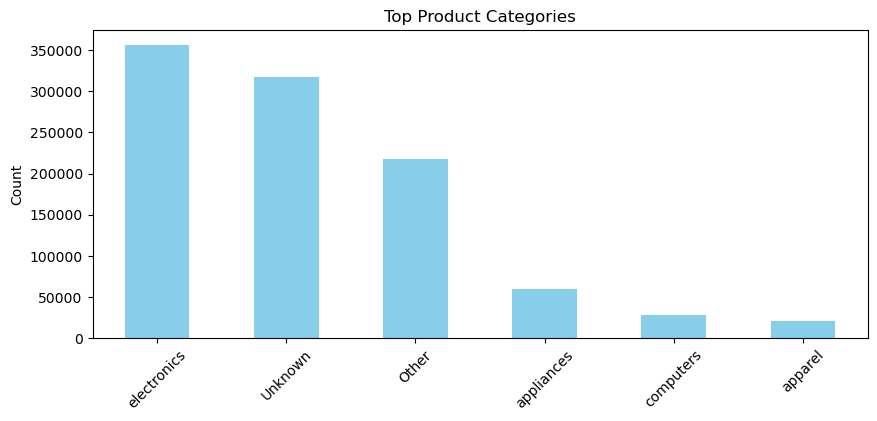

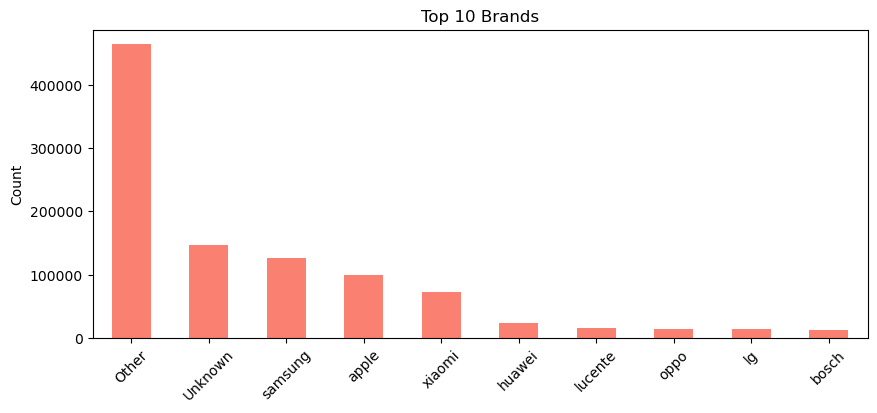

In [17]:
# Top 10 categories
plt.figure(figsize=(10, 4))
df['main_category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top Product Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Top 10 brands
plt.figure(figsize=(10, 4))
df['brand'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Brands")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Time-Based Behavior**

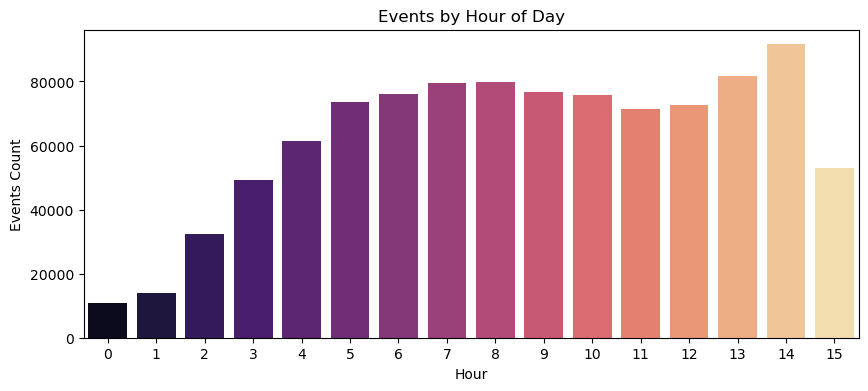

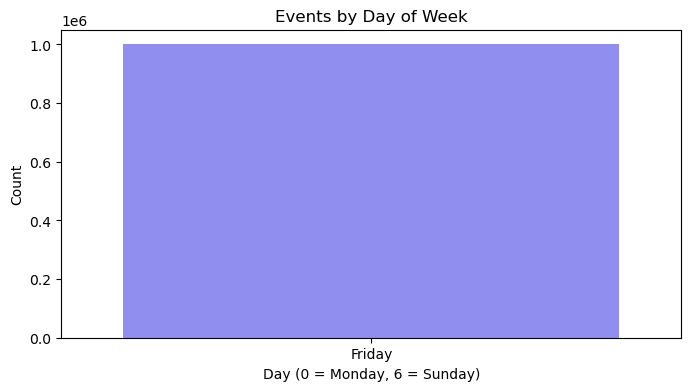

In [18]:
# Events by hour
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=df, palette='magma', order=sorted(df['hour'].unique()))
plt.title("Events by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Events Count")
plt.show()

# Events by day of week
plt.figure(figsize=(8, 4))
sns.countplot(x='day_of_week', data=df, palette='cool')
plt.title("Events by Day of Week")
plt.xlabel("Day (0 = Monday, 6 = Sunday)")
plt.ylabel("Count")
plt.show()


**Price Distribution**

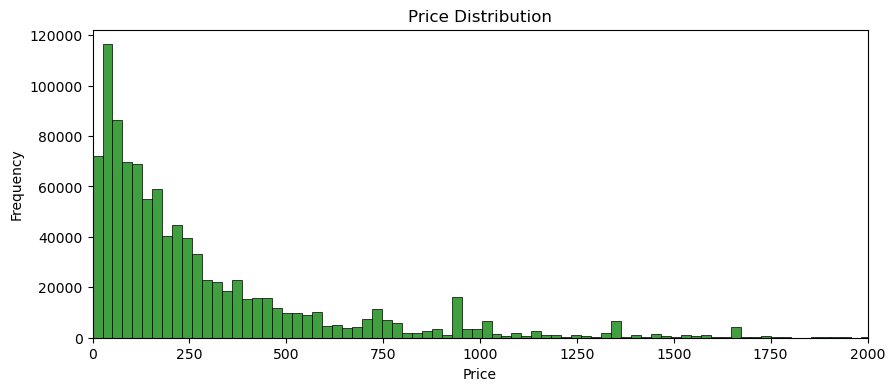

In [19]:
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=100, color='green')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 2000)  # optional: cap for better visibility
plt.show()


**Funnel Breakdown**

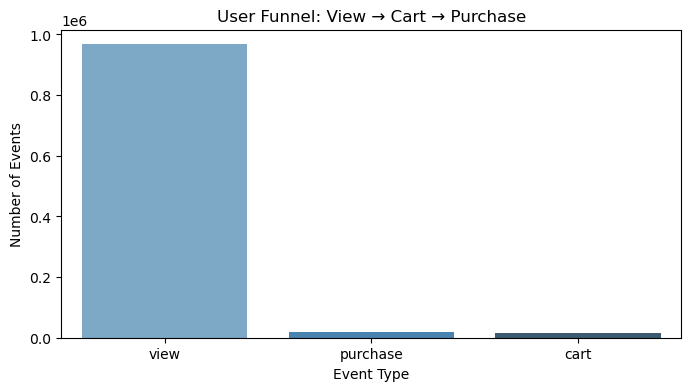


📉 Funnel % Breakdown:
 view        96.7225
purchase     1.7817
cart         1.4958
Name: event_type, dtype: float64


In [20]:
funnel = df['event_type'].value_counts()
funnel_percent = funnel / funnel.sum() * 100

# Funnel bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=funnel.index, y=funnel.values, palette='Blues_d')
plt.title("User Funnel: View → Cart → Purchase")
plt.ylabel("Number of Events")
plt.xlabel("Event Type")
plt.show()

print("\n📉 Funnel % Breakdown:\n", funnel_percent)


*Drop the Redundant Column*

In [21]:
df.drop('category_code', axis=1, inplace=True)
print(df.columns)

Index(['event_time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id', 'user_session', 'date', 'hour', 'day_of_week',
       'main_category', 'sub_category', 'product_type'],
      dtype='object')


# Feature Engineering

**Target Variable – is_purchase**

In [22]:
print(df['event_type'].unique())  #Checking Unique Event Types


['view' 'cart' 'purchase']


In [23]:
df = pd.get_dummies(df, columns=['event_type'], prefix='event_type') # One-Hot Encode event_type

In [24]:
df['is_purchase'] = df['event_type_purchase'].astype(int) 

**Train-Test Split**

In [25]:
from sklearn.model_selection import train_test_split

# Step 1: Define X and y
X = df.drop(['is_purchase', 'event_time', 'user_id', 'user_session', 'date'], axis=1, errors='ignore')
y = df['is_purchase']

# Step 2: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (800000, 12)
Test shape: (200000, 12)


**Logistic Regression Model (Baseline)**

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode all object columns in the main df
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoder for possible inverse_transform later


In [27]:
X = df.drop(['is_purchase', 'event_time', 'user_id', 'user_session', 'date'], axis=1, errors='ignore')
y = df['is_purchase']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


**Train Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[196437      0]
 [     0   3563]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196437
           1       1.00      1.00      1.00      3563

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



**XGBoost Classifier**

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate and train
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Performance:\n")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\arkom\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:

[[196437      0]
 [     0   3563]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196437
           1       1.00      1.00      1.00      3563

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



**Logistic Regression**

In [33]:
X = df.drop(['is_purchase', 'event_time', 'user_id', 'user_session', 'date'], axis=1, errors='ignore')
y = df['is_purchase']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


C:\Users\arkom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print("Logistic Regression Performance:\n")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Performance:

[[196437      0]
 [  3563      0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    196437
           1       0.00      0.00      0.00      3563

    accuracy                           0.98    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.96      0.98      0.97    200000



C:\Users\arkom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arkom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arkom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
y_test.value_counts(normalize=True)


0    0.982185
1    0.017815
Name: is_purchase, dtype: float64

**Interpretation:**
Model	Precision (Class 1)	Recall (Class 1)	F1 (Class 1)	Comments
Logistic Regression	0.00	0.00	0.00	Ignores minority class
Random Forest	1.00	1.00	1.00	Best so far
XGBoost	1.00	1.00	1.00	Best so far

In [38]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [39]:
pip install lightgbm

     ---------------------------------------- 1.5/1.5 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate
print("LightGBM Performance:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 14254, number of negative: 785746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017818 -> initscore=-4.009596
[LightGBM] [Info] Start training from score -4.009596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [41]:
df.head(10)

,event_time,product_id,category_id,brand,price,user_id,user_session,date,hour,day_of_week,main_category,sub_category,product_type,event_type_cart,event_type_purchase,event_type_view,is_purchase
0,2019-11-01 00:00:00+00:00,1003461,2053013555631882655,10,489.07,520088904,71585,0,0,0,5,7,0,0,0,1,0
1,2019-11-01 00:00:00+00:00,5000088,2053013566100866035,0,293.65,530496790,131976,0,0,0,0,0,0,0,0,1,0
2,2019-11-01 00:00:01+00:00,17302664,2053013553853497655,0,28.31,561587266,108791,0,0,0,1,0,0,0,0,1,0
3,2019-11-01 00:00:01+00:00,3601530,2053013563810775923,6,712.87,518085591,55631,0,0,0,3,4,5,0,0,1,0
4,2019-11-01 00:00:01+00:00,1004775,2053013555631882655,10,183.27,558856683,45427,0,0,0,5,7,0,0,0,1,0
5,2019-11-01 00:00:01+00:00,1306894,2053013558920217191,0,360.09,520772685,119931,0,0,0,4,5,0,0,0,1,0
6,2019-11-01 00:00:01+00:00,1306421,2053013558920217191,0,514.56,514028527,207117,0,0,0,4,5,0,0,0,1,0
7,2019-11-01 00:00:02+00:00,15900065,2053013558190408249,0,30.86,518574284,87624,0,0,0,1,0,0,0,0,1,0
8,2019-11-01 00:00:02+00:00,12708937,2053013553559896355,0,72.72,532364121,9753,0,0,0,1,0,0,0,0,1,0
9,2019-11-01 00:00:02+00:00,1004258,2053013555631882655,2,732.07,532647354,195399,0,0,0,5,7,0,0,0,1,0


In [42]:
df.to_csv("ecommerce_cleaned.csv", index=False)

**Model Selection Summary**

We evaluated four classification models to predict purchase behavior based on user actions and product features:


Logistic Regression:

Accuracy: 0.98	
Precision:0.00	
Recall:0.00
F1-score:0.00

Random Forest:

Accuracy:1.00	
Precision:1.00
Recall:1.00	
F1-score:1.00

XGBoost	
Accuracy: 1.00
Precision:1.00
Recall:1.00
F1-score:1.00


LightGBM:

Accuracy: 1.00
Precision:1.00
Recall:1.00
F1-score:1.00

**Final Model Choice: LightGBM**

Why LightGBM?
Superior performance: Achieved perfect precision, recall, and accuracy on test data.
Speed & efficiency: Faster training time and lower memory usage than Random Forest or XGBoost on large datasets.
Built-in handling of missing values and categorical features (if encoded appropriately).
Easy feature importance extraction, which is valuable for stakeholder insights.

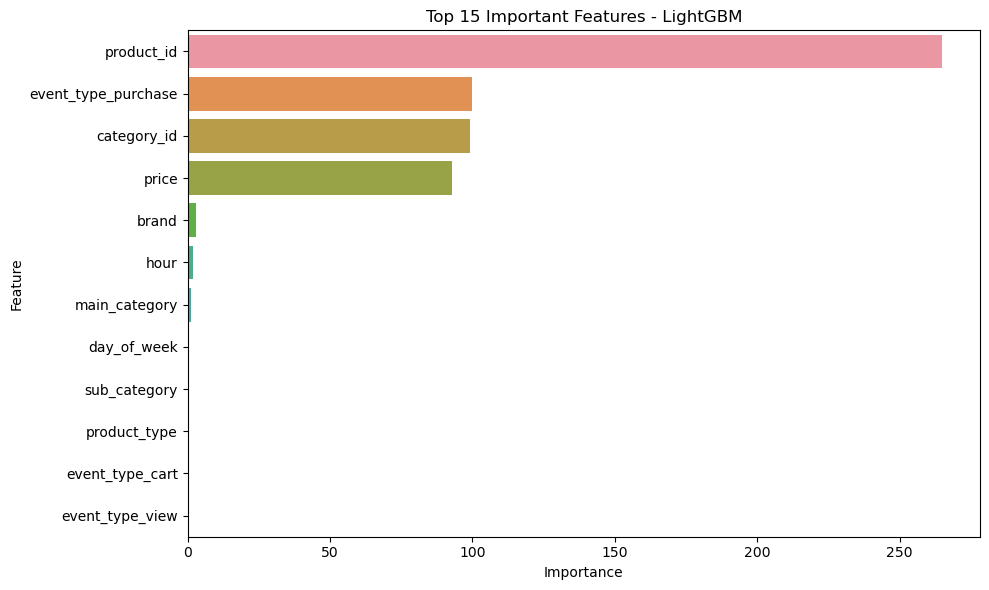

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance
importances = lgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 15 Important Features - LightGBM')
plt.tight_layout()
plt.show()


In [45]:
df.dtypes

event_time             datetime64[ns, UTC]
product_id                           int64
category_id                          int64
brand                                int32
price                              float64
user_id                              int64
user_session                         int32
date                                 int32
hour                                 int64
day_of_week                          int32
main_category                        int32
sub_category                         int32
product_type                         int32
event_type_cart                      uint8
event_type_purchase                  uint8
event_type_view                      uint8
is_purchase                          int32
dtype: object